# Deutsch-Josza algorithm for qudits

In [14]:
#First, we import the libaries
import quforge.quforge as qf

In [25]:
device = 'cpu'

dim = 3 #dimension of the qudit
wires = 4 #number of qudits

In [26]:
# Define oracle
def oracle(model, mode='constant'):
    if mode == 'constant':
        model.X(index=[wires-1])
    else:
        model.CNOT(index=[2,3])
    return model

# Define circuit
circuit = qf.Circuit(dim=dim, 
                     wires=wires, 
                     device=device)
circuit.H(index=range(wires))

# Apply oracle
oracle(circuit, mode='constant')

# Hadamard on the first N-1 qudits
circuit.H(index=range(wires-1))

In [27]:
# Initial state
state = ''
for i in range(wires-1):
    state += '0-'
state += '%i' % (dim-1)
state = qf.State(state, dim=dim, device=device)

In [28]:
# Apply the initial state in the circuit
output = circuit(state)

# Measure the first N-1 qudits
histogram, p = qf.measure(output, 
                          index=range(wires-1), 
                          dim=dim, 
                          wires=wires, 
                          shots=1024)

print(histogram)
if p[0] == 1:
    print('The function is constant')
else:
    print('The function is balanced')

{'000': 1024, '001': 0, '002': 0, '010': 0, '011': 0, '012': 0, '020': 0, '021': 0, '022': 0, '100': 0, '101': 0, '102': 0, '110': 0, '111': 0, '112': 0, '120': 0, '121': 0, '122': 0, '200': 0, '201': 0, '202': 0, '210': 0, '211': 0, '212': 0, '220': 0, '221': 0, '222': 0}
The function is constant


<BarContainer object of 27 artists>

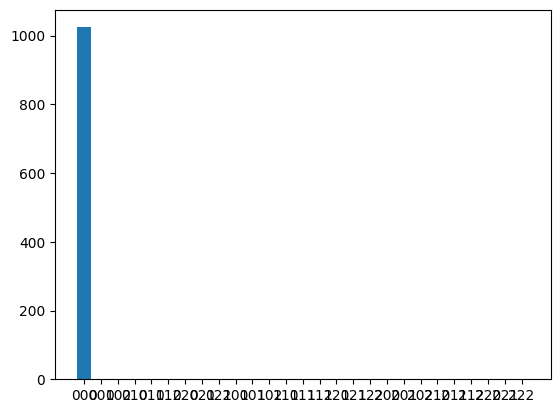

In [29]:
import matplotlib.pyplot as plt

keys = list(histogram.keys())
values = list(histogram.values())

plt.bar(keys, values)